# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import seaborn as sns
from pprint import  pprint
import json
import scipy.stats as sc


# Impor the OpenWeatherMap API key
from api_keys_kuhl import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [13]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [14]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    # Log the url, record, and set numbers
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

    
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        if (response.status_code == 200):
            # Extract Data
            city_weather = response.json()

            # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
            city_name = city_weather.get("name")
            city_lat = city_weather.get("coord", {}).get("lat")
            city_lng= city_weather.get("coord", {}).get("lon")
            city_country = city_weather.get("sys",{}).get("country")
            city_date = city_weather.get("dt")
            city_humidity = city_weather.get("main",{}).get("humidity")
            city_max_temp = city_weather.get("main",{}).get("temp_max")
            city_pressure = city_weather.get("main",{}).get("pressure")
            city_clouds = city_weather.get("clouds",{}).get("all")
            city_wind = city_weather.get("wind",{}).get("speed")
            

            # Append the City information into city_data list
            city_data.append({"City": city_name,
                              "Lat": city_lat,
                              "Lng": city_lng,
                              "Max Temp": city_max_temp,
                              "Pressure": city_pressure,
                              "Humidity": city_humidity,
                              "Cloudiness": city_clouds,
                              "Wind Speed": city_wind,
                              "Country": city_country,
                              "Date": city_date
                              
                              })
        else:
            print(non_200)
            print()

        # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

        # pause to avoid rate limiting
        time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | gunnison
Processing Record 2 of Set 1 | afaahiti
Processing Record 3 of Set 1 | ban karon
Processing Record 4 of Set 1 | iqaluit
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | plastun
Processing Record 7 of Set 1 | onguday
Processing Record 8 of Set 1 | fuvahmulah
City not found. Skipping...
Processing Record 9 of Set 1 | dali
Processing Record 10 of Set 1 | blackmans bay
Processing Record 11 of Set 1 | sedro-woolley
Processing Record 12 of Set 1 | lebu
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | arno
Processing Record 15 of Set 1 | island harbour
Processing Record 16 of Set 1 | thompson
Processing Record 17 of Set 1 | chibougamau
Processing Record 18 of Set 1 | puerto natales
Processing Record 19 of Set 1 | port macquarie
Processing Record 20 of Set 1 | cidreira
Processing Record 21 of Set 1 | turbat
Processing Record 22 of Set 1 | port

In [15]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Pressure      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [16]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Pressure,Humidity,Cloudiness,Wind Speed,Country,Date
0,Gunnison,38.7000,-107.0673,-23.53,1034,78,7,2.52,US,1733016385
1,Afaahiti,-17.7500,-149.2833,26.59,1011,77,60,3.99,PF,1733016385
2,Ban Karon,7.8477,98.2985,28.77,1010,84,99,2.75,TH,1733016385
3,Iqaluit,63.7506,-68.5145,-6.15,1020,57,75,6.17,CA,1733016386
4,Port-aux-Français,-49.3500,70.2167,5.84,984,95,100,12.89,TF,1733016386


In [17]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [18]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Pressure,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,,
0,Gunnison,38.7000,-107.0673,-23.53,1034,78,7,2.52,US,1733016385
1,Afaahiti,-17.7500,-149.2833,26.59,1011,77,60,3.99,PF,1733016385
2,Ban Karon,7.8477,98.2985,28.77,1010,84,99,2.75,TH,1733016385
3,Iqaluit,63.7506,-68.5145,-6.15,1020,57,75,6.17,CA,1733016386
4,Port-aux-Français,-49.3500,70.2167,5.84,984,95,100,12.89,TF,1733016386


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

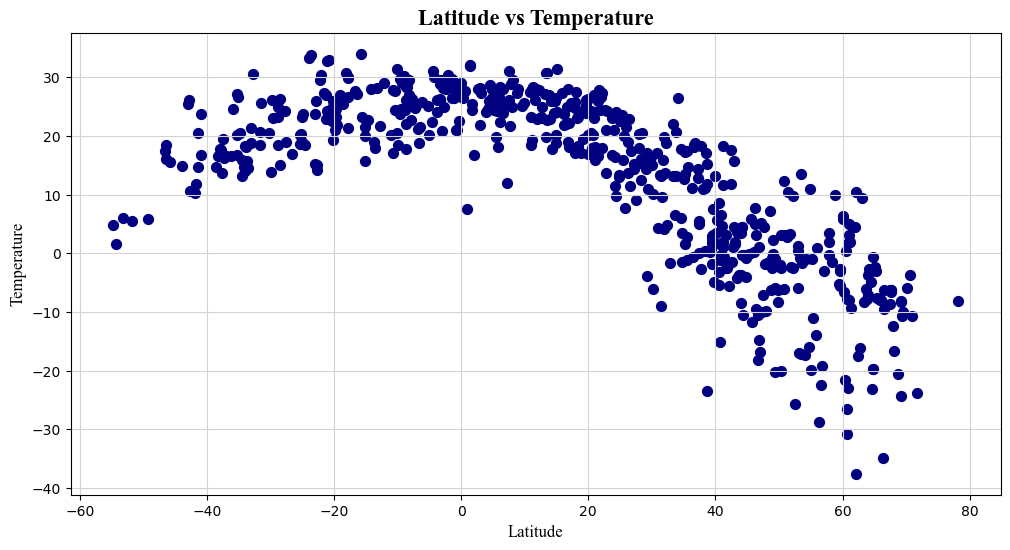

In [19]:
# Build scatter plot for latitude vs. temperature
# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(city_data_df.Lat, city_data_df["Max Temp"], color="Navy", s=50)

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Latitude", fontfamily="Times new roman", fontsize=12)
plt.ylabel("Temperature", fontfamily="Times new roman", fontsize=12)
plt.title("Latitude vs Temperature", fontweight="bold", fontsize=16, fontfamily="Times new roman")
plt.grid(color="lightgray")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

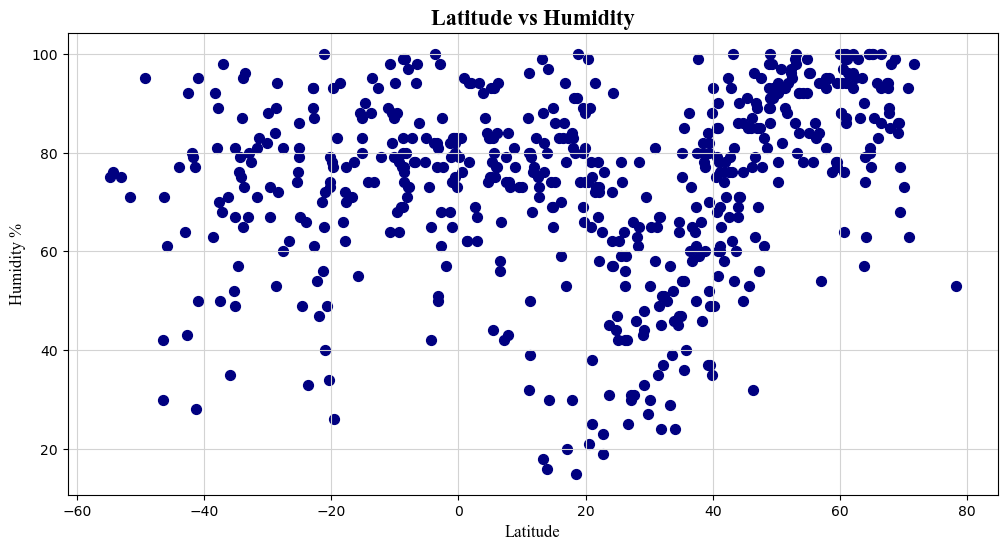

In [20]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(city_data_df.Lat, city_data_df["Humidity"], color="Navy", s=50)

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Latitude", fontfamily="Times new roman", fontsize=12)
plt.ylabel("Humidity %", fontfamily="Times new roman", fontsize=12)
plt.title("Latitude vs Humidity", fontweight="bold", fontsize=16, fontfamily="Times new roman")
plt.grid(color="lightgray")
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

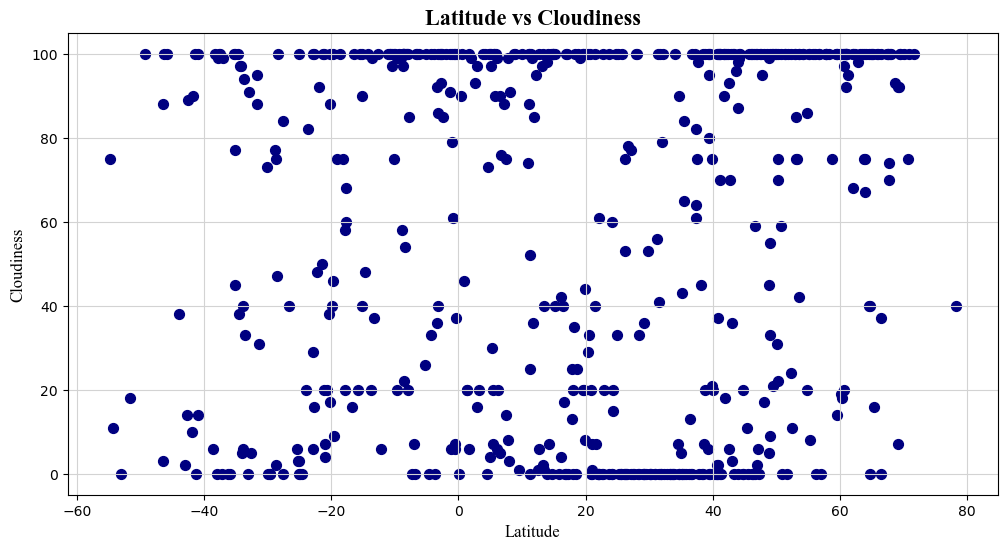

In [21]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(city_data_df.Lat, city_data_df["Cloudiness"], color="Navy", s=50)

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Latitude", fontfamily="Times new roman", fontsize=12)
plt.ylabel("Cloudiness", fontfamily="Times new roman", fontsize=12)
plt.title("Latitude vs Cloudiness", fontweight="bold", fontsize=16, fontfamily="Times new roman")
plt.grid(color="lightgray")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

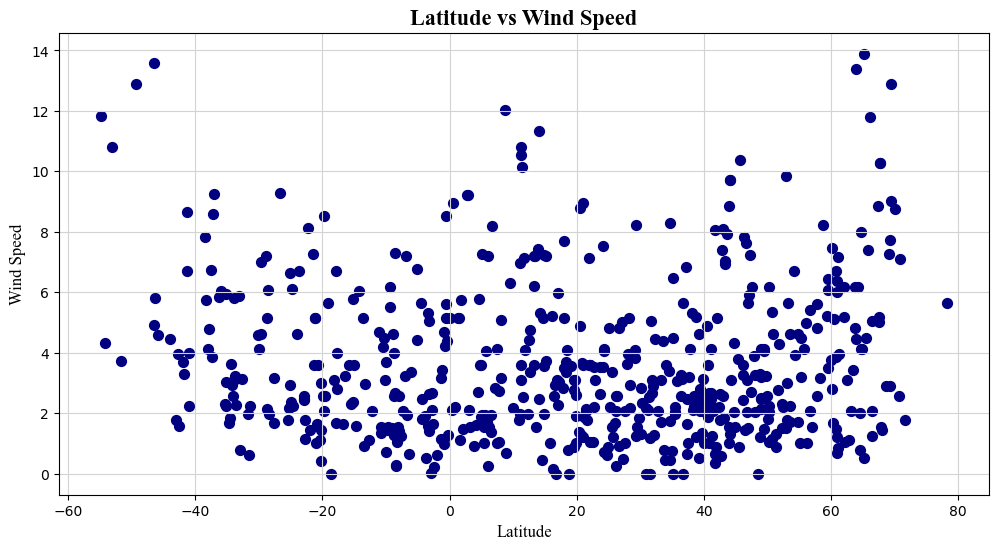

In [22]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(city_data_df.Lat, city_data_df["Wind Speed"], color="Navy", s=50)

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Latitude", fontfamily="Times new roman", fontsize=12)
plt.ylabel("Wind Speed", fontfamily="Times new roman", fontsize=12)
plt.title("Latitude vs Wind Speed", fontweight="bold", fontsize=16, fontfamily="Times new roman")
plt.grid(color="lightgray")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [23]:
# Define a function to create Linear Regression plots
def do_regression_plot(x_values, y_values, x_label, y_label, annotation):

    # Do Regression
    (slope, intercept, rvalue, pvalue, stderr) = sc.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(line_eq)
    print(rvalue)

    #Change Canvas Size
    plt.figure(figsize=(12, 6))
    
    # Create a basic plot
    plt.scatter(x_values, y_values, color="Red", edgecolor="black", s=200)
    plt.plot(x_values, regress_values, color="black", linewidth=6) # the regression line
    
    # Customizations
    
    plt.xlabel(x_label, fontfamily="Times new roman", fontsize=12)
    plt.ylabel(y_label, fontfamily="Times new roman", fontsize=12)
    
    
    # Add in a background grid
    plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
    
    # Annotate
    plt.annotate(line_eq, (0, 5), fontsize=15, color="black")
    
    # Show/Save the Graph
    plt.show()

In [24]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
NH_df = city_data_df.loc[city_data_df.Lat >= 0].reset_index(drop=True)

# Display sample data
NH_df.head()

,City,Lat,Lng,Max Temp,Pressure,Humidity,Cloudiness,Wind Speed,Country,Date
0,Gunnison,38.7000,-107.0673,-23.53,1034,78,7,2.52,US,1733016385
1,Ban Karon,7.8477,98.2985,28.77,1010,84,99,2.75,TH,1733016385
2,Iqaluit,63.7506,-68.5145,-6.15,1020,57,75,6.17,CA,1733016386
3,Plastun,44.7561,136.2939,-4.00,1011,50,0,4.32,RU,1733016386
4,Onguday,50.7500,86.1500,-6.05,1027,97,59,1.15,RU,1733016386


In [25]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
SH_df = city_data_df.loc[city_data_df.Lat <= 0].reset_index(drop=True)

# Display sample data
SH_df.head()

,City,Lat,Lng,Max Temp,Pressure,Humidity,Cloudiness,Wind Speed,Country,Date
0,Afaahiti,-17.7500,-149.2833,26.59,1011,77,60,3.99,PF,1733016385
1,Port-aux-Français,-49.3500,70.2167,5.84,984,95,100,12.89,TF,1733016386
2,Blackmans Bay,-43.0167,147.3167,25.41,997,64,2,1.79,AU,1733016387
3,Lebu,-37.6167,-73.6500,13.72,1016,70,100,6.74,CL,1733016230
4,Puerto Natales,-51.7236,-72.4875,5.57,1002,71,18,3.74,CL,1733016164


###  Temperature vs. Latitude Linear Regression Plot

y = -0.65x + 31.6
-0.8479321662318283


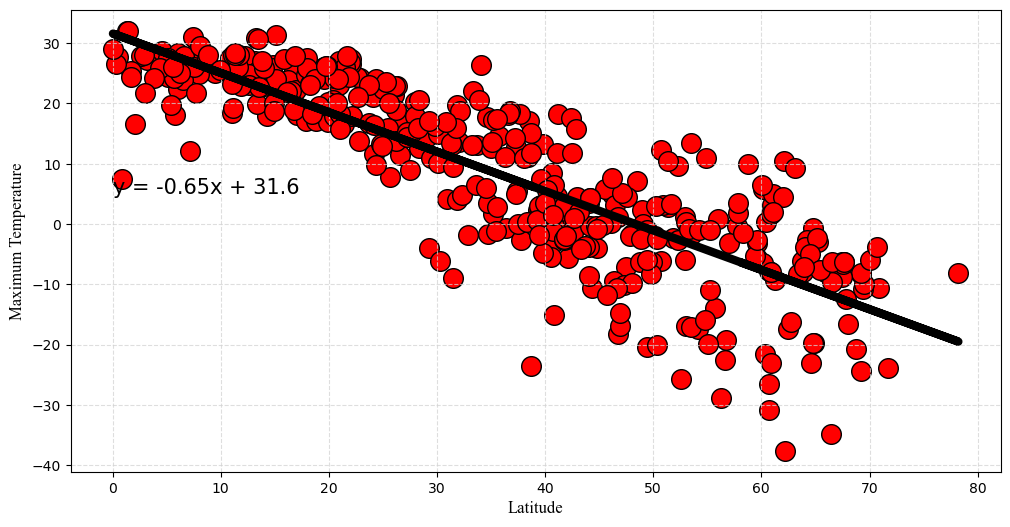

In [26]:
# Linear regression on Northern Hemisphere
x_values = NH_df.Lat
y_values = NH_df["Max Temp"]
x_label = "Latitude"
y_label = "Maximum Temperature"


annotation = (0, 0)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)
plt.show()

y = 0.28x + 28.22
0.6429866720655412


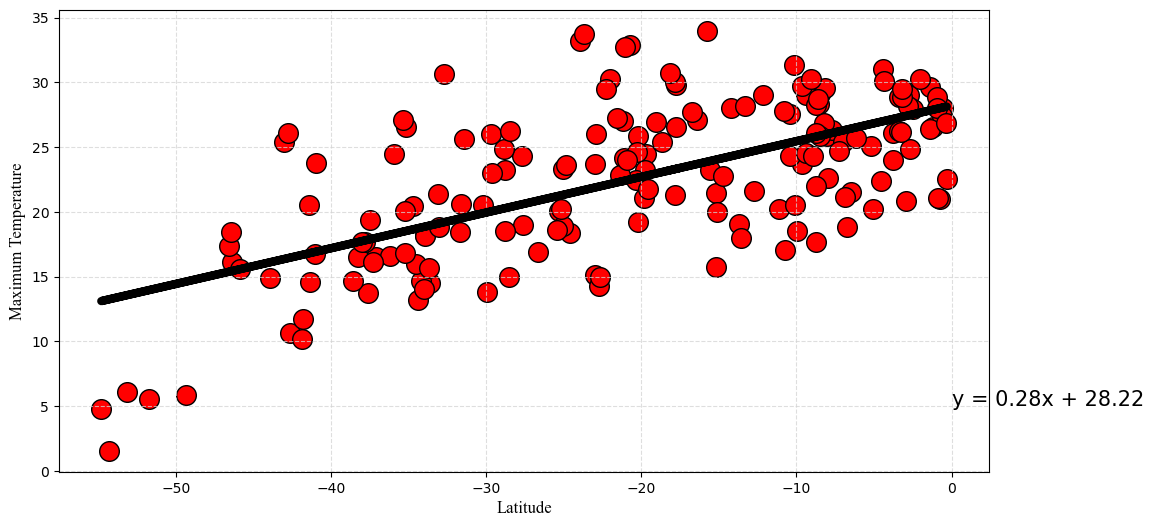

In [27]:
# Linear regression on Southern Hemisphere
x_values = SH_df.Lat
y_values = SH_df["Max Temp"]
x_label = "Latitude"
y_label = "Maximum Temperature"


annotation = (-10, 50)


do_regression_plot(x_values, y_values, x_label, y_label, annotation)
plt.show()

We find by the graphs in our linear regression models (above), that Latitude and maximum temperature are correlated in regards to which hemisphere you are studying. For Example, we see that as we get closer othe equater (Lat = 0) The max temperature gets warmer. While going further away both north and south of the equator we will see that the temperature decreases.

### Humidity vs. Latitude Linear Regression Plot

y = 0.33x + 61.68
0.31896112074695265


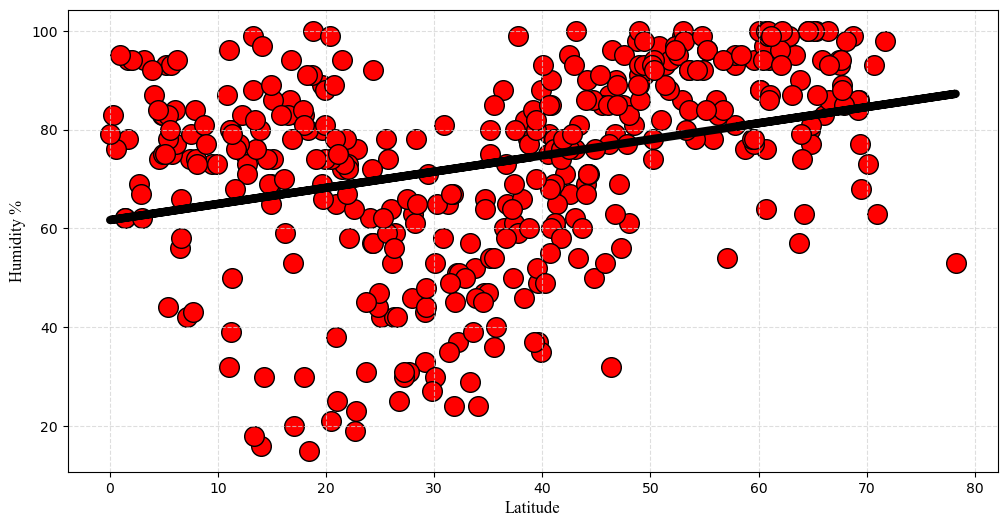

In [28]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x_values = NH_df.Lat
y_values = NH_df["Humidity"]
x_label = "Latitude"
y_label = "Humidity %"
annotation = (60, 25)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)
plt.show()

y = 0.21x + 78.74
0.1900176362053281


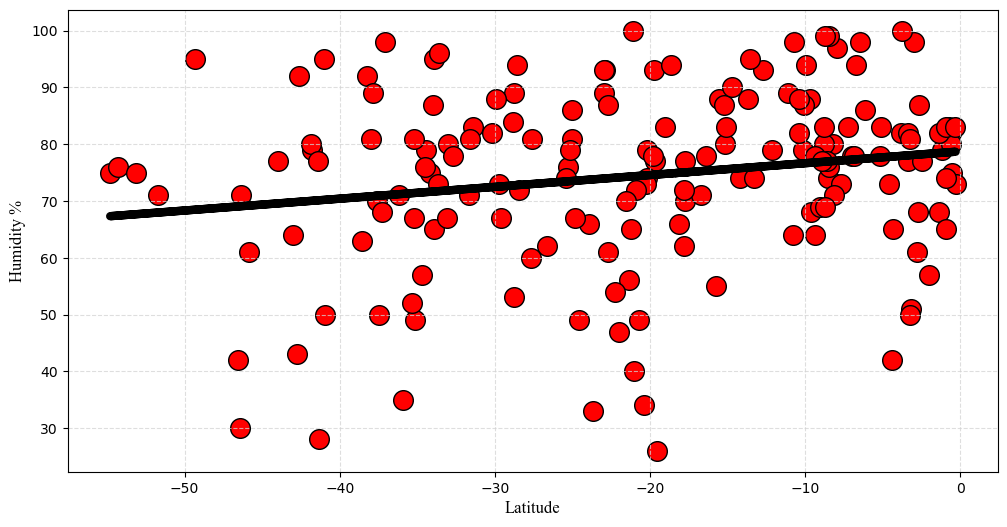

In [29]:
# Southern Hemisphere
x_values = SH_df.Lat
y_values = SH_df["Humidity"]
x_label = "Latitude"
y_label = "Humidity %"


annotation = (0, 0)


do_regression_plot(x_values, y_values, x_label, y_label, annotation)
plt.show()

Measuring the humidity percentage against latitude we find there is little correlation between latitude and humidity. With an rvalue^2 as high as 0.35. These variables can not be explained by one another, or they have a small "gooodness of fit".

### Cloudiness vs. Latitude Linear Regression Plot

y = 0.49x + 37.77
0.21751202188494728


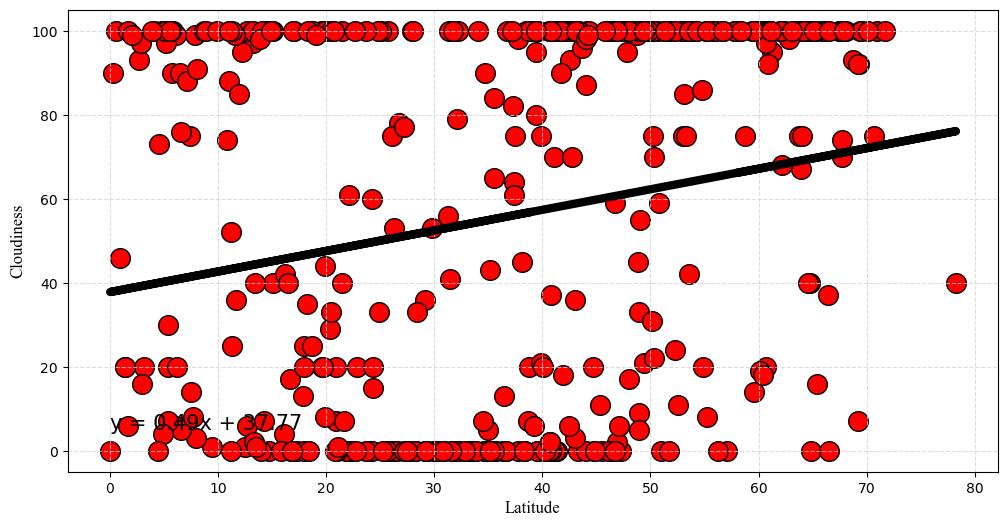

In [30]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x_values = NH_df.Lat
y_values = NH_df["Cloudiness"]
x_label = "Latitude"
y_label = "Cloudiness"
annotation = (0, 0)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)
plt.show()


y = 0.64x + 73.19
0.22484252814340214


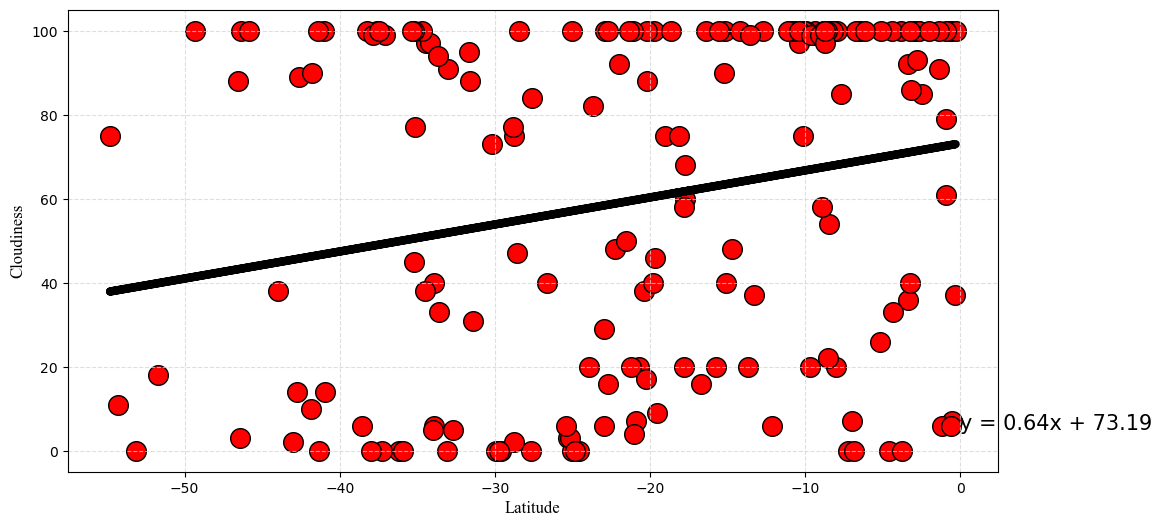

In [31]:
# Southern Hemisphere
# Linear regression on Northern Hemisphere
x_values = SH_df.Lat
y_values = SH_df["Cloudiness"]
x_label = "Latitude"
y_label = "Cloudiness"
annotation = (0, 0)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)
plt.show()

In measuring cloudiness vs latitude we find little correlation between the two variables. We see by the the graph that the line of best fit cannot accurately acount for most of the cities in the dataframe.

### Wind Speed vs. Latitude Linear Regression Plot

y = 0.02x + 3.06
0.11655501498611483


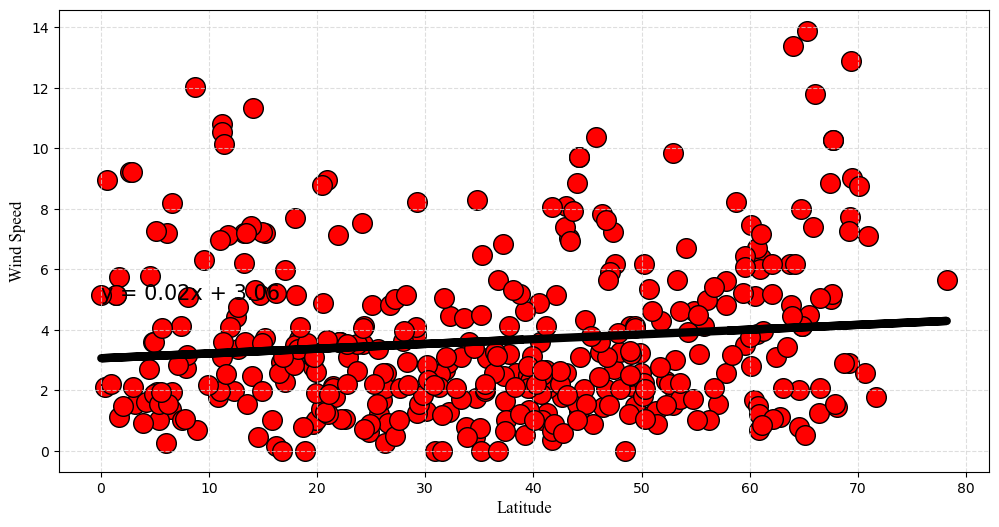

In [32]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x_values = NH_df.Lat
y_values = NH_df["Wind Speed"]
x_label = "Latitude"
y_label = "Wind Speed"
annotation = (0, 0)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)
plt.show()

y = -0.07x + 2.24
-0.38497422770615425


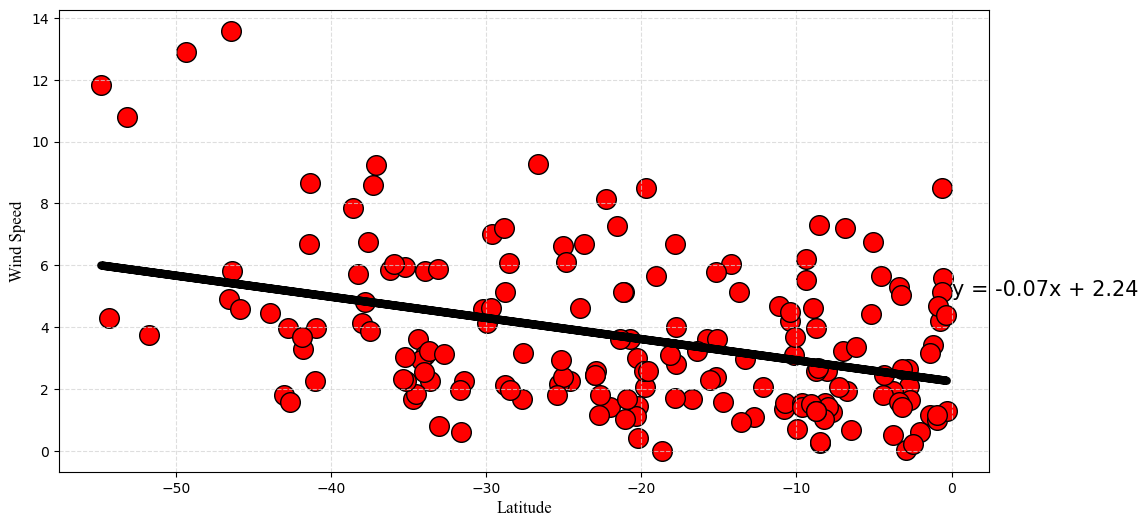

In [33]:
# Southern Hemisphere
# Linear regression on Northern Hemisphere
x_values = SH_df.Lat
y_values = SH_df["Wind Speed"]
x_label = "Latitude"
y_label = "Wind Speed"
annotation = (0, 0)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)
plt.show()

In latitude vs windspeed we find that which ever hemisphere the city accoured in wind speeds typically stayed under 10 mph. Also, having low r^2 values the variables have a very weak "goodness of fit".